회귀의 선형모델

In [3]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
#한글 폰트사용
from matplotlib import font_manager, rc
font_name =font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

w[0]: 0.393906  b: -0.031804


C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


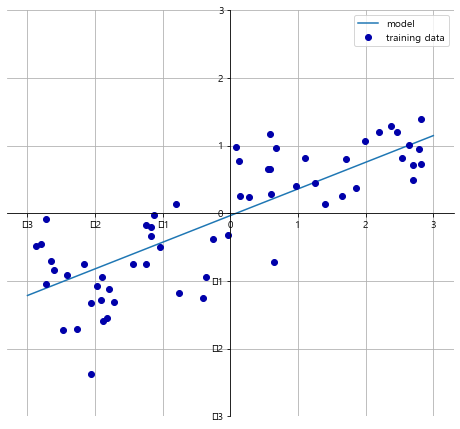

In [5]:
mglearn.plots.plot_linear_regression_wave() # w[0]는 기울기, b는 y절편

선형 회귀(최소제곱법)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

lr = LinearRegression().fit(X_train,y_train)

In [7]:
print("lr.coef_:",lr.coef_) # 회귀직선의 각 변수 별 계수, wave data set은 변수가 1개이므로 계수또한 1개의 값만 반환
print("lr.intercept_:",lr.intercept_) #회귀직선의 절편 (b0)

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [8]:
print("train set score: {:.2f}".format(lr.score(X_train,y_train)))
print("test set score: {:.2f}".format(lr.score(X_test,y_test)))

train set score: 0.67
test set score: 0.66


In [9]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
lr = LinearRegression().fit(X_train,y_train)

In [10]:
print("train set score: {:.2f}".format(lr.score(X_train,y_train)))
print("test set score: {:.2f}".format(lr.score(X_test,y_test)))

# train set score와 test set score 의 차이가 많이 나므로 
# 이는 모델이 과대적합되었다는 확실한 신호이므로 복잡도를 제어할 수 있는 모델이 필요. -> 리지회귀

train set score: 0.95
test set score: 0.61


리지 회귀

In [11]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)
print("train set score: {:.2f}".format(ridge.score(X_train,y_train)))
print("test set score: {:.2f}".format(ridge.score(X_test,y_test)))

# ridge reg. 는 유의미한 변수들을 선택하여 유의미하지않은 변수들의 가중치(계수)를 0에 가까운 수로 만든다.
# 이렇게 되면 자동적으로 유의미하지않은 변수들은 회귀방정식에서 영향력이 거의 없어지며 모델을 조금 더 단순하게 만드는데에 도움을 준다.
# 모델을 단순하게 만듦으로써 train set에서의 성능은 나빠지지만 test set에 대한 성능은 좋아지므로 
# 선형회귀보다 Ridge reg.가 더 좋은 모델이라고 할 수 있다.

train set score: 0.89
test set score: 0.75


In [12]:
# Ridge reg. 는 alpha 매개변수로 얼마나 모델을 단순하게 만들지를 결정함.
# default값은 alpha=1.0 이다. alpha = 0.00001 로 지정하면 선형회귀 결과와 동일.(하지만 이 예제만 그런건지 검증x)
# alpha값을 줄이면 계수에 대한 제약이 조금씩 풀리면서 모델이 단순해지지 않는다.
# 즉, alpha값이 높을수록 모델은 단순해진다.
# 리지 모델을 사용할때는 최적의 alpha값을 찾는 것도 모델을 만드는데에 도움을 준다.

ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("train set score: {:.2f}".format(ridge10.score(X_train,y_train)))
print("test set score: {:.2f}".format(ridge10.score(X_test,y_test)))

train set score: 0.79
test set score: 0.64


In [13]:
ridge01 = Ridge(alpha=.1).fit(X_train,y_train)
print("train set score: {:.2f}".format(ridge01.score(X_train,y_train)))
print("test set score: {:.2f}".format(ridge01.score(X_test,y_test)))

train set score: 0.93
test set score: 0.77


C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


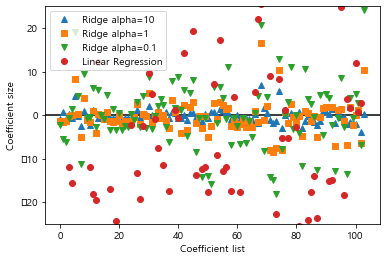

In [14]:
# alpha값이 1, 10, 0.1 중에서 0.1 일 때가 가장 좋은 성능을 낸다고 볼 수 있다. 
# alpha값에 따라 모델의 coef_ 속성이 어떻게 달라지는지를 확인해보기.

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="Linear Regression")
plt.xlabel("Coefficient list")
plt.ylabel("Coefficient size")
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-25,25)
plt.legend()

위 그림을 보면 먼저 alpha=10 인 ridge의 계수는 -3에서 3사이에 위치하고 alpha값이 작아질수록 계수의 크기또한 커짐을 알 수 있다.
계수에 대한 아무런 규제가 없는(alpha=0) 선형 회귀의 계수는 값이 더 커져 그림 밖으로 넘어감을 알 수 있다.

규제의 효과를 이해하는 또 다른 방법은 alpha값을 고정하고 train set의 크기를 변화시켜 보는 것 이다.

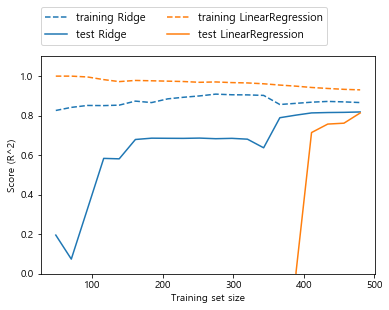

In [15]:
mglearn.plots.plot_ridge_n_samples() 
# 보스턴 주택가격 데이터셋에서 여러가지크기로 샘플링하여 Linear reg. 와 Ridge reg.(alpha=1)을 적용한 그림.
# 데이터셋의 크기에 따른 모델의 성능 변화를 나타낸 그래프를 학습곡선(learning curve)이라고 한다.

위 그림을 보면 먼저 모든 데이터셋에 대해 리지와 선형회귀 모두 train set이 test set점수보다 높음을 알 수 있다. 리지에는 규제가 들어가므로 리지의 train set 점수가 선형회귀의 train set 점수보다 낮다. 

하지만 test set에 대한 점수는 리지가 더 높으며 size가 작은 경우 특히 더 리지가 높음을 볼 수 있다. size가 400미만에서 선형회귀는 학습을 하지 못하고 있지만 두 회귀방법 모두 데이터가 많아질수록 좋아지고 마지막에는 선형회귀가 리지회귀를 따라잡는다. 

즉, 데이터 갯수를 충분하게 주면 규제 항이 덜 중요해져서 리지 회귀와 선형 회귀의 성능이 같아질 것이다.

라소 회귀

In [16]:
# 라소 회귀는 리지회귀와 유사하게 특정 변수의 걔수를 0에 가깝게 만들려하지만 리지 회귀와는 다르게 계수를 0으로 만듦.
# 즉, 완전히 제외되는 변수가 생긴다는 뜻 -> 변수선택이 자동으로 이루어짐.

from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train,y_train)
print("train set score: {:.2f}".format(lasso.score(X_train,y_train)))
print("test set score: {:.2f}".format(lasso.score(X_test,y_test)))
print("사용한 특성의 개수:", np.sum(lasso.coef_ != 0))

train set score: 0.29
test set score: 0.21
사용한 특성의 개수: 4


In [17]:
# 라소는 train set과 test set 에서 모두 점수가 좋지않음. 이는 과소적합임을 알 수 있다.
# 과소적합을 줄이기 위해서 alpha값을 줄여야함. 하지만 alpha값을 줄일려면 max_iter(반복실행하는 최대 횟수)의 기본값을 늘여야함.
lasso001 = Lasso(alpha=.01).fit(X_train,y_train)

C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.902458003173706, tolerance: 3.233182126649077
  positive)


In [18]:
lasso001 = Lasso(alpha=.01, max_iter=100000).fit(X_train,y_train)
print("train set score: {:.2f}".format(lasso001.score(X_train,y_train)))
print("test set score: {:.2f}".format(lasso001.score(X_test,y_test)))
print("사용한 특성의 개수:", np.sum(lasso001.coef_ != 0))

train set score: 0.90
test set score: 0.77
사용한 특성의 개수: 33


In [19]:
# alpha 값을 낮추면 모델의 복잡도는 증가하여 모델의 성능이 앞서 기본 모델보다 좋아짐.
# 성능은 Ridge보다 조금 좋은 모델이며, Ridge는 104개의 변수를 다 사용하였고 Lasso는 33개의 변수만 사용하여 분석에 용이함을 알 수 있다.
lasso00001 = Lasso(alpha=.0001, max_iter=100000).fit(X_train,y_train)
print("train set score: {:.2f}".format(lasso00001.score(X_train,y_train)))
print("test set score: {:.2f}".format(lasso00001.score(X_test,y_test)))
print("사용한 특성의 개수:", np.sum(lasso00001.coef_ != 0))

# 하지만 alpha값을 너무 낮추면 제한조건이 없어져 과대적합이 되고 결과값이 Linear reg. 와 유사하게 됨.

train set score: 0.95
test set score: 0.64
사용한 특성의 개수: 96


Text(0, 0.5, 'Coefficient size')

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


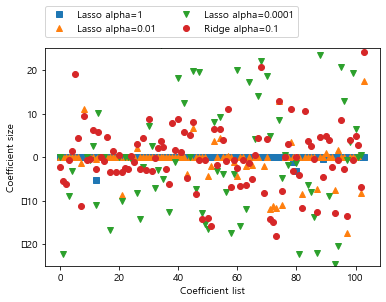

In [20]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2,loc=(0,1.05))
plt.ylim(-25,25)
plt.xlabel("Coefficient list")
plt.ylabel("Coefficient size")

위 그림에서 alpha=0.1 인 ridge reg. 와 alpha=0.01 인 Lasso reg. 의 성능이 비슷하지만 보통은 Ridge reg.를 선호함.
하지만 변수가 많고 그 중 일부분만 중요하고, 분석하기 쉬운 모델을 원한다면 Lasso reg. 가 더 분석 취지에 적합함.

Lasso 와 Ridge의 패널티를 결합한 ElasticNet이 있음. 
이 조합은 최상의 성능을 내지만 Ridge의 규제 L2-norm 와 Lasso의 규제 L1-norm을 조정해야함.

분류용 선형 모델

C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


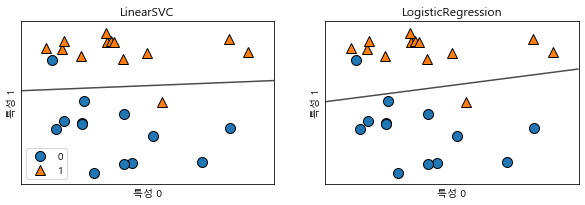

In [21]:
# 로지스틱 회귀, 서포트 벡터 머신
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1,2,figsize=(10,3))

for model, ax in zip([LinearSVC(),LogisticRegression()], axes):
    clf = model.fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=False,eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
    
axes[0].legend()

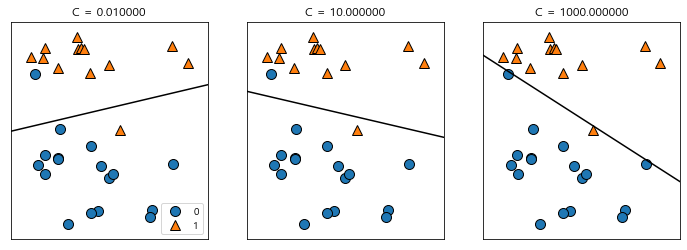

In [22]:
mglearn.plots.plot_linear_svc_regularization()

SVC와 Logistic reg.에서는 매개변수 C로 제한 규재의 강도를 결정한다.
C값이 높으면 train set에 최대로 맞춰서 분류를 하며 너무 높으면 과대적합을 일으킨다.
C값이 낮으면 모델은 데이터 포인트 중 다수에 맞추려고 한다.

In [23]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
logreg = LogisticRegression().fit(X_train,y_train)
print("train set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("test set score: {:.3f}".format(logreg.score(X_test,y_test)))

train set score: 0.955
test set score: 0.958


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [24]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)
print("train set score: {:.3f}".format(logreg100.score(X_train,y_train)))
print("test set score: {:.3f}".format(logreg100.score(X_test,y_test)))

train set score: 0.972
test set score: 0.965


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [25]:
logreg001 = LogisticRegression(C=0.01).fit(X_train,y_train)
print("train set score: {:.3f}".format(logreg001.score(X_train,y_train)))
print("test set score: {:.3f}".format(logreg001.score(X_test,y_test)))

train set score: 0.934
test set score: 0.930


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


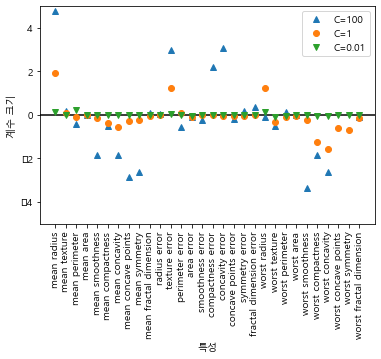

In [26]:
# C값이 100일때 가장 좋은 성능을 가짐. -> 이는 이 데이터에 대해 복잡도가 높은 모델일수록 성능이 좋음을 말함.

plt.plot(logreg100.coef_.T,'^',label="C=100")
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg001.coef_.T,'v',label="C=0.01")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5)
plt.xlabel("특성")
plt.ylabel("계수 크기")
plt.legend()

기본적으로 Logistic reg.는 L2 규제를 적용하므로 결과 또한 Ridge와 유사함. L2 규제를 사용하므로써 변수가 많은 경우에 모델을 이해하기 어려움이 있다.

이처럼 변수가 많은 경우 더 이해하기 쉬운 모델을 원한다면 L1규제를 사용하는 것이 이해하는데에 좋음.

C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C=0.001 인 l1 로지스틱 회귀의 train accuracy: 0.91
C=0.001 인 l1 로지스틱 회귀의 test accuracy: 0.92
C=1.000 인 l1 로지스틱 회귀의 train accuracy: 0.96
C=1.000 인 l1 로지스틱 회귀의 test accuracy: 0.96
C=100.000 인 l1 로지스틱 회귀의 train accuracy: 0.99
C=100.000 인 l1 로지스틱 회귀의 test accuracy: 0.98


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


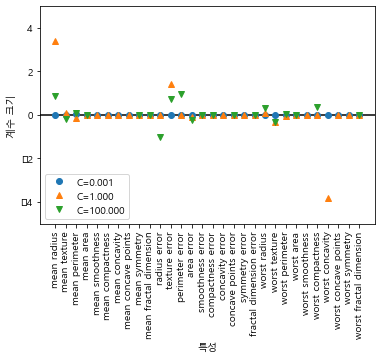

In [28]:
#L1 규제 적용해보기.
for C, marker in zip([0.001,1,100],['o','^','v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train,y_train)
    print("C={:.3f} 인 l1 로지스틱 회귀의 train accuracy: {:.2f}".format(C,lr_l1.score(X_train,y_train)))
    print("C={:.3f} 인 l1 로지스틱 회귀의 test accuracy: {:.2f}".format(C,lr_l1.score(X_test,y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.xlabel("특성")
plt.ylabel("계수 크기")

plt.ylim(-5,5)
plt.legend(loc=3)

다중 클래스 분류용 선형 모델

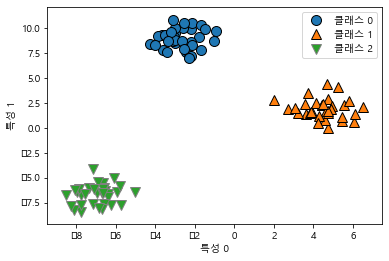

In [32]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

In [33]:
linear_svm = LinearSVC().fit(X,y)
print("Size of Coefficient array: ", linear_svm.coef_.shape)
print("Size of intercept array: ", linear_svm.intercept_.shape)

Size of Coefficient array:  (3, 2)
Size of intercept array:  (3,)


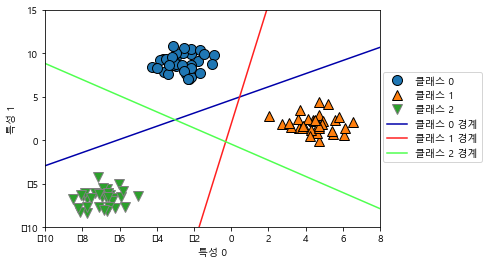

In [35]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1],c=color)
plt.ylim(-10,15)
plt.xlim(-10,8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'],loc=(1.01,0.3))

분류 경계 중 그림 중앙의 삼각형 영역은 어떻게 구분하는가? -> 분류공식의 결과가 가장 높은 클래스로 분류.
즉, 가장 가까운 직선의 클래스가 됨.

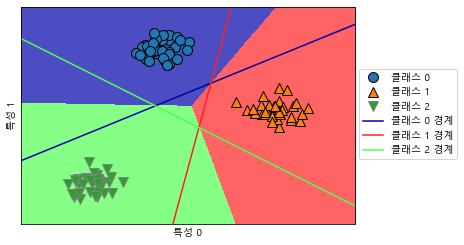

In [36]:
mglearn.plots.plot_2d_classification(linear_svm,X,fill=True, alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line*coef[0]+intercept)/coef[1],c=color)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계', '클래스 2 경계'],loc=(1.01,0.3))

###장단점과 매개변수###

회귀모델에서의 주요 매개변수는 alpha, LinearSVC와 Logistic reg.에서는 C이고, alpha가 클수록, C가 작을수록 모델이 단순해짐.
C와 alpha는 로그스케일(0.01, 0.1, 1, 10, ...)로 최적치를 정함. 그리고 규제를 L1과 L2중에 결정해야함.
중요한 특성이 많지않다고 생각하거나 분석에 있어 모델의 해석이 중요한 요소일 경우 L1 규제를, 그렇지 않으면 기본적으로 L2 규제를 사용. 
선형 모델은 학습속도가 빠르고 예측도 빠름. 수십만, 수백만개의 샘플로 이뤄진 대용량 데이터셋에서는 기본설정보다 빨리 처리하도록 Logistic Reg. 와 Ridge 에 solver = 'sag' 옵션을 줌. 다른 대안으로는 대용량 처리버전 선형모델인 SGDClassifier와 SGDRegressor를 사용. 

메소드 연결

In [39]:
# 한 줄에서 모델의 객체를 생성과 학습을 한번에 실행함.

logreg = LogisticRegression().fit(X_train,y_train) # fit 메소드의 반환값(즉, self)은 학습된 모델로, 변수 logreg에 할당 = "메소드 연결"

logreg = LogisticRegression()
y_pred = logreg.fit(X_train,y_train).predict(X_test)
# 위의 두 줄의 모델을 만들고 훈련하고 예측하는 일을 모두 한줄로 쓸 수 있다.

y_pred = LogisticRegression().fit(X_train,y_train).predict(X_test)

print(y_pred)

[1 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1
 1 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 0
 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1]


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
